In [1]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import cv2

# 16 X 16 patch (Size: 400 X 400)

In [2]:
IMG = "13Bands_Cropped.tif"
BANDS = (2, 3, 4)
start_x, start_y = (50, 600)
size = 400
window_size = 16
to_pad = int(window_size / 2)

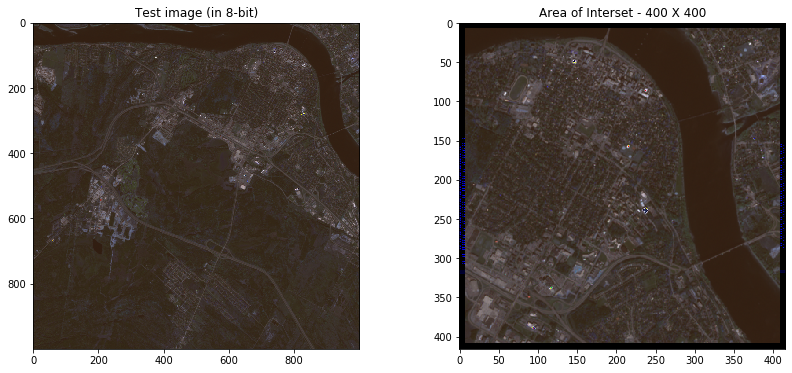

In [3]:
test_img = rasterio.open(IMG).read(BANDS)

# Plotting
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Test image plot
test_img_to_plot = ((test_img / (2**12-1)) * 255).astype('uint8')
img1 = ax1.imshow(np.transpose(test_img_to_plot, (1, 2, 0)))
# plt.colorbar(img1, ax=ax1, fraction=0.046, pad=0.04)
ax1.set_title("Test image (in 8-bit)")

# AOI plot
test_img_aoi = test_img[:, start_x:start_x+size, start_y:start_y+size]
test_img_aoi = np.pad(test_img_aoi, ((0, 0), (to_pad, to_pad), (to_pad, to_pad)), mode="empty")
test_img_aoi_toplot = ((test_img_aoi / (2**12-1)) * 255).astype('uint8')
img2 = ax2.imshow(np.transpose(test_img_aoi_toplot, (1, 2, 0)))
# plt.colorbar(img2, fraction=0.046, pad=0.04)
ax2.set_title("Area of Interset - 400 X 400")

plt.show()

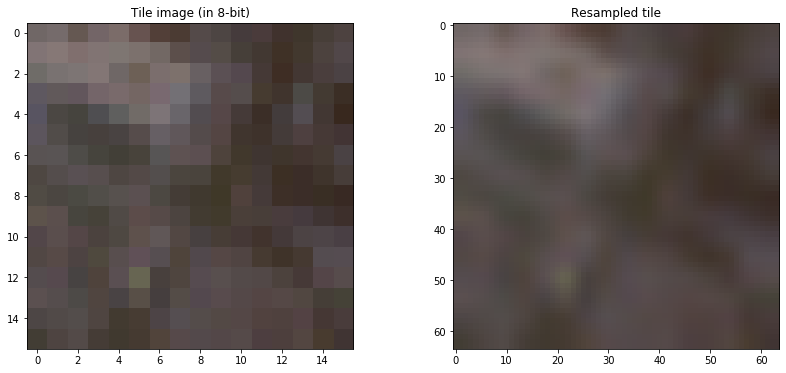

In [25]:
i, j = 300, 50

tile_img = test_img_aoi[:, i:i+window_size, j:j+window_size]
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Test image plot
tile_img_toplot = ((tile_img / (2**12-1)) * 255).astype('uint8')
img1 = ax1.imshow(np.transpose(tile_img_toplot, (1, 2, 0)))
# plt.colorbar(img1, ax=ax1, fraction=0.046, pad=0.04)
ax1.set_title("Tile image (in 8-bit)")

# AOI plot
resampled_tile = np.zeros((3, 64, 64))
for i in range(3):
    resampled_tile[i] = cv2.resize(tile_img[i], dsize=(64, 64)) # Bilinear Interpolation by default
resampled_tile_toplot = ((resampled_tile / (2**12-1)) * 255).astype('uint8')
img2 = ax2.imshow(np.transpose(resampled_tile_toplot, (1, 2, 0)))
# plt.colorbar(img2, fraction=0.046, pad=0.04)
ax2.set_title("Resampled tile")

plt.show()

# 8 X 8 patch (100 X 100)

In [4]:
IMG = "13Bands_Cropped.tif"
BANDS = (2, 3, 4)
start_x, start_y = (350, 700)
size = 100
window_size = 8
to_pad = int(window_size / 2)

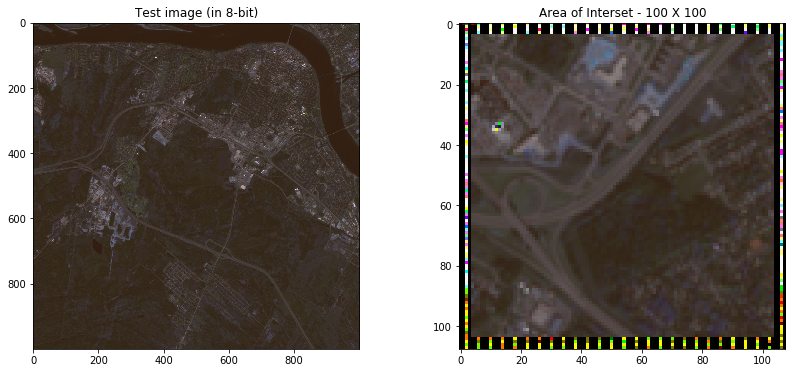

In [6]:
test_img = rasterio.open(IMG).read(BANDS)

# Plotting
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Test image plot
test_img_to_plot = ((test_img / (2**12-1)) * 255).astype('uint8')
img1 = ax1.imshow(np.transpose(test_img_to_plot, (1, 2, 0)))
# plt.colorbar(img1, ax=ax1, fraction=0.046, pad=0.04)
ax1.set_title("Test image (in 8-bit)")

# AOI plot
test_img_aoi = test_img[:, start_x:start_x+size, start_y:start_y+size]
test_img_aoi = np.pad(test_img_aoi, ((0, 0), (to_pad, to_pad), (to_pad, to_pad)), mode="empty")
test_img_aoi_toplot = ((test_img_aoi / (2**12-1)) * 255).astype('uint8')
img2 = ax2.imshow(np.transpose(test_img_aoi_toplot, (1, 2, 0)))
# plt.colorbar(img2, fraction=0.046, pad=0.04)
ax2.set_title("Area of Interset - 100 X 100")

plt.show()

# Linear Enhancement

In [8]:
IMG = "13Bands_Cropped.tif"
BANDS = (2, 3, 4)
start_x, start_y = (350, 700)
size = 100
window_size = 8
to_pad = int(window_size / 2)

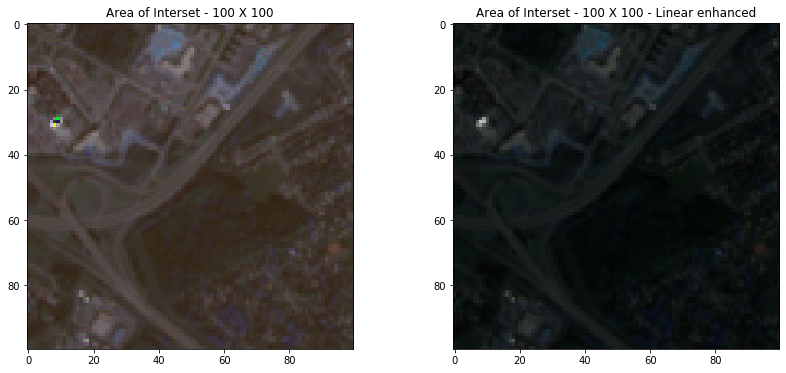

In [44]:
test_img = rasterio.open(IMG).read(BANDS)

# Enhancement
newImage = np.zeros(test_img.shape, dtype=test_img.dtype)
for bandNo in range(3):
    maxVal = np.max(test_img[bandNo])
    minVal = np.min(test_img[bandNo])
    newImage[bandNo] = ((test_img[bandNo] - minVal) / (maxVal - minVal)) * (2**12-1)

# Plotting
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# AOI plot
test_img_aoi1 = test_img[:, start_x:start_x+size, start_y:start_y+size]
# test_img_aoi = np.pad(test_img_aoi, ((0, 0), (to_pad, to_pad), (to_pad, to_pad)), mode="empty")
test_img_aoi_toplot1 = ((test_img_aoi1 / (2**12-1)) * 255).astype('uint8')
img1 = ax1.imshow(np.transpose(test_img_aoi_toplot1, (1, 2, 0)))
# plt.colorbar(img2, fraction=0.046, pad=0.04)
ax1.set_title("Area of Interset - 100 X 100")
  
# AOI plot enhanced
test_img_aoi2 = newImage[:, start_x:start_x+size, start_y:start_y+size]
#test_img_aoi = np.pad(test_img_aoi, ((0, 0), (to_pad, to_pad), (to_pad, to_pad)), mode="empty")
test_img_aoi_toplot2 = ((test_img_aoi2 / (2**12-1)) * 255).astype('uint8')
img2 = ax2.imshow(np.transpose(test_img_aoi_toplot2, (1, 2, 0)))
# plt.colorbar(img2, fraction=0.046, pad=0.04)
ax2.set_title("Area of Interset - 100 X 100 - Linear enhanced")

plt.show()